# Analise de dados do dataset Contoso (Empresa Fictícia)

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? 
2. Qual foi o faturamento da empresa?   
3. Qual o % de funcionários que já fechou algum contrato?  
4. Calcule o total de contratos que cada área da empresa já fechou
5. Calcule o total de funcionários por área
6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

### Identificação das Variáveis 

In [4]:
from platform import python_version
print('Versão da Linguagem Python:', python_version())

Versão da Linguagem Python: 3.9.13


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Ler arquivos csv:

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';', decimal = ',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

#Retirar colunas desnecessárias para a análise:
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis = 1)
display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [5]:
funcionarios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Nome Completo   114 non-null    object 
 2   Salario Base    114 non-null    int64  
 3   Impostos        114 non-null    float64
 4   Beneficios      114 non-null    float64
 5   VT              114 non-null    int64  
 6   VR              114 non-null    float64
 7   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 7.2+ KB


In [7]:
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB


In [8]:
servicos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Codigo do Servico                237 non-null    object
 1   ID Funcionário                   237 non-null    int64 
 2   ID Cliente                       237 non-null    int64 
 3   Tempo Total de Contrato (Meses)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


#### 1. Valor Total da Folha Salarial

In [9]:
salariofunc_df = funcionarios_df[['Salario Base', 'Impostos', 'Beneficios', 'VT', 'VR']].sum().sum()

In [10]:
print('Total da folha salarial é de R${:,}'.format(salariofunc_df.round(2)))

Total da folha salarial é de R$2,717,493.22


In [16]:
#Resultado com graficos
somas_salarios = funcionarios_df.groupby('Area').sum()

C:\Users\Gregory Moliner\AppData\Local\Temp\ipykernel_10248\4099060136.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  somas_salarios = funcionarios_df.groupby('Area').sum()


<AxesSubplot:xlabel='Area', ylabel='Salario Base'>

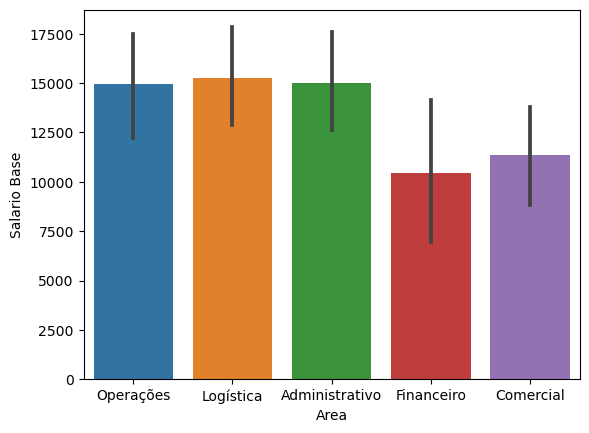

In [17]:
sns.barplot(x = 'Area', y = 'Salario Base', data = funcionarios_df)

#### 2. Qual foi o faturamento da empresa?

In [19]:
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on = 'ID Cliente')
display(faturamentos_df)

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


In [20]:
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print('Faturamento Total: R${:,}'.format(sum(faturamentos_df['Faturamento Total'])))

Faturamento Total: R$5,519,160


#### 3. Qual o % de funcionários que já fechou algum contrato?

In [21]:
servicosfechados_df = servicos_df['ID Funcionário'].unique()

In [22]:
funcionariostotal_df = funcionarios_df['ID Funcionário'].count()

In [23]:
totalcontratos_df = len(servicosfechados_df) / funcionariostotal_df

In [24]:
print('A porcentagem de funcionarios que fecharam servico foi de {:.2%}'.format(totalcontratos_df))

A porcentagem de funcionarios que fecharam servico foi de 86.84%


#### 4. Calcule o total de contratos que cada área da empresa já fechou

In [25]:
servicos_df.head()

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


In [26]:
funcionarios_df.head()

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo


In [28]:
contratos_area_df = servicos_df.merge(funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')

In [29]:
contratos_area_qtde = contratos_area_df['Area'].value_counts().reset_index()

In [30]:
contratos_area_qtde.columns = ['Area', 'Contratos']

<AxesSubplot:xlabel='Area', ylabel='Contratos'>

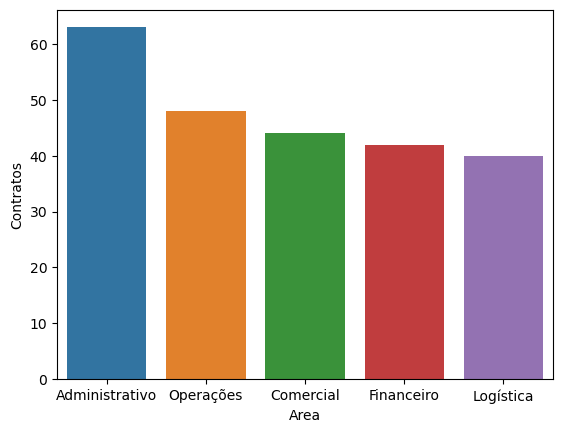

In [31]:
sns.barplot(x = 'Area', y = 'Contratos', data = contratos_area_qtde)

#### 5. Calcule o total de funcionários por área

In [32]:
qtdfuncionarios_area_df = funcionarios_df['Area'].value_counts().reset_index()
print(qtdfuncionarios_area_df)

            index  Area
0  Administrativo    26
1       Comercial    26
2       Operações    23
3       Logística    21
4      Financeiro    18


In [33]:
qtdfuncionarios_area_df.columns = ['Area', 'Funcionários']

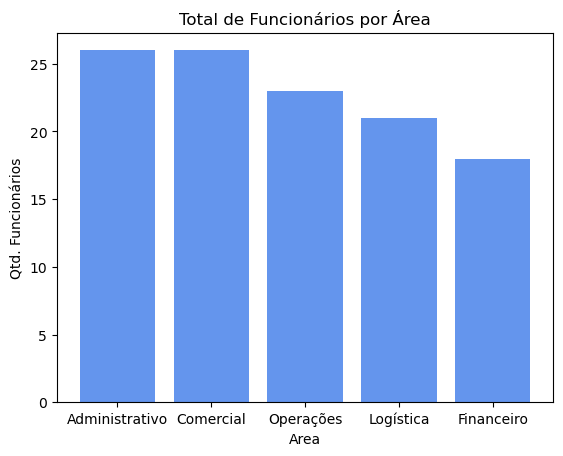

In [40]:
plt.bar(qtdfuncionarios_area_df['Area'], qtdfuncionarios_area_df['Funcionários'], color = 'cornflowerblue')
plt.xlabel('Area')
plt.ylabel('Qtd. Funcionários')
plt.title('Total de Funcionários por Área')
plt.show()

#### 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [41]:
ticket_medio_df = clientes_df['Valor Contrato Mensal'].mean()

In [42]:
print('O ticket médio mensal é de R${:,.2f}'.format(ticket_medio_df))

O ticket médio mensal é de R$2,502.56
